In [225]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [226]:
#Create dataframe from excel file for all states, all data categories
overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data2/All States All Data Collected.xlsx')

#Subset dataframe to only include states that have expanded Medicare
mask = overall_data.Expanded == 'Expanded'
expanded = overall_data[mask]

#Subset dataframe to only include states that have not expanded Medicare
mask = overall_data.Expanded != 'Expanded'
not_expanded = overall_data[mask]


In [255]:
not_expanded.describe()

,% overweight or obese,"% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000","Mortality Rate per 100,000","Suicide Rate per 100,000",Life Expectancy,"% Adults, Health Poor","% Adults, Health Fair","% Adults, Health Good","% Adults, Health Very Good","% Adults, Health Excellent",Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),"% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.675632,17.036842,170.952632,154.478947,39.342105,778.415789,17.347368,78.132105,0.052053,0.132947,0.319474,0.324474,0.171158,0.641284,0.130395,0.096979,0.131358,0.126208,0.327053,0.087854
std,0.025133,2.806384,28.427908,14.264937,5.888814,80.756962,3.639806,1.599380,0.014516,0.016652,0.014339,0.026513,0.019285,0.027172,0.013912,0.011607,0.017811,0.024605,0.050472,0.025310
min,0.621000,9.000000,143.100000,120.000000,31.500000,657.900000,13.400000,74.890000,0.033000,0.111000,0.296000,0.281000,0.133000,0.583600,0.106600,0.078100,0.093500,0.092740,0.248000,0.053887
25%,0.661000,15.450000,150.300000,147.250000,34.800000,720.350000,14.300000,77.150000,0.042500,0.116500,0.311500,0.309000,0.159000,0.617150,0.123400,0.092050,0.121650,0.110030,0.290000,0.067661
50%,0.679000,17.400000,157.900000,152.400000,38.900000,753.900000,16.500000,78.680000,0.048000,0.132000,0.318000,0.322000,0.173000,0.646300,0.128300,0.095700,0.124700,0.121740,0.336000,0.087204
75%,0.692000,19.100000,182.100000,163.700000,42.350000,822.400000,19.400000,79.385000,0.061000,0.147000,0.326500,0.344000,0.185500,0.656650,0.135000,0.102200,0.145900,0.134675,0.347500,0.107077
max,0.733000,20.700000,228.500000,179.700000,51.800000,934.800000,25.200000,80.040000,0.082000,0.163000,0.353000,0.362000,0.205000,0.688400,0.171200,0.122900,0.160000,0.181990,0.436000,0.137747


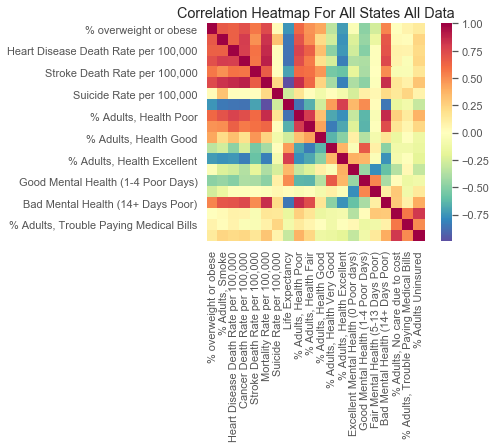

In [227]:
# Correlation Heatmap For All States all Data
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)

plt.title('Correlation Heatmap For All States All Data')
plt.savefig('Heatmap_all_states_all_data.png')

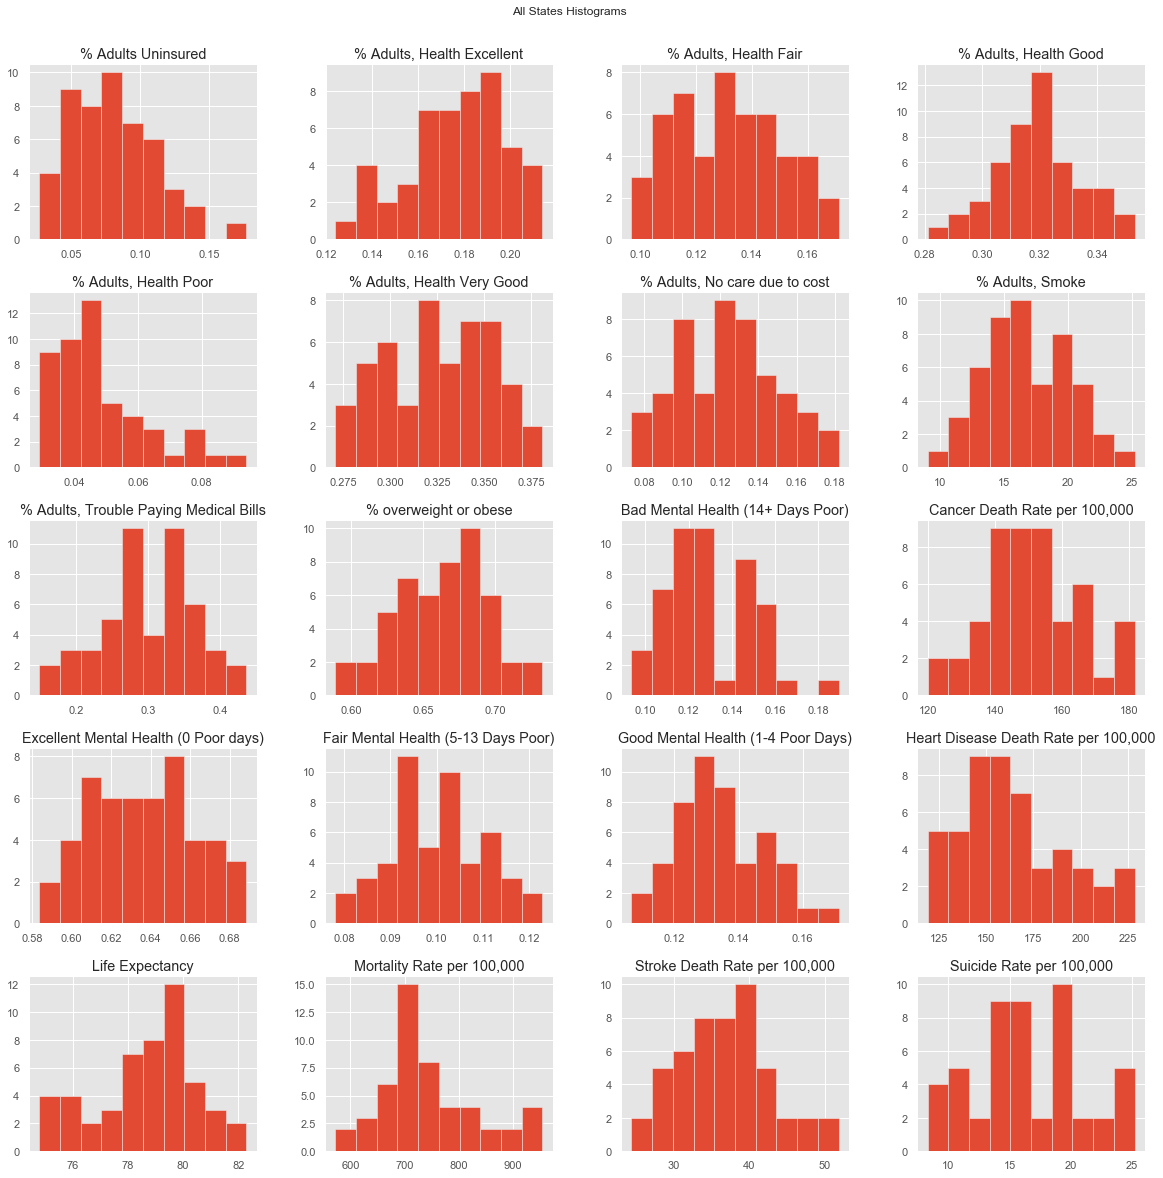

In [228]:
#Histograms for all states all data
overall_data.hist(figsize = (20,20))
pl.suptitle("All States Histograms" , y = .92)
plt.savefig("All_States_All_Data_Histograms.png")

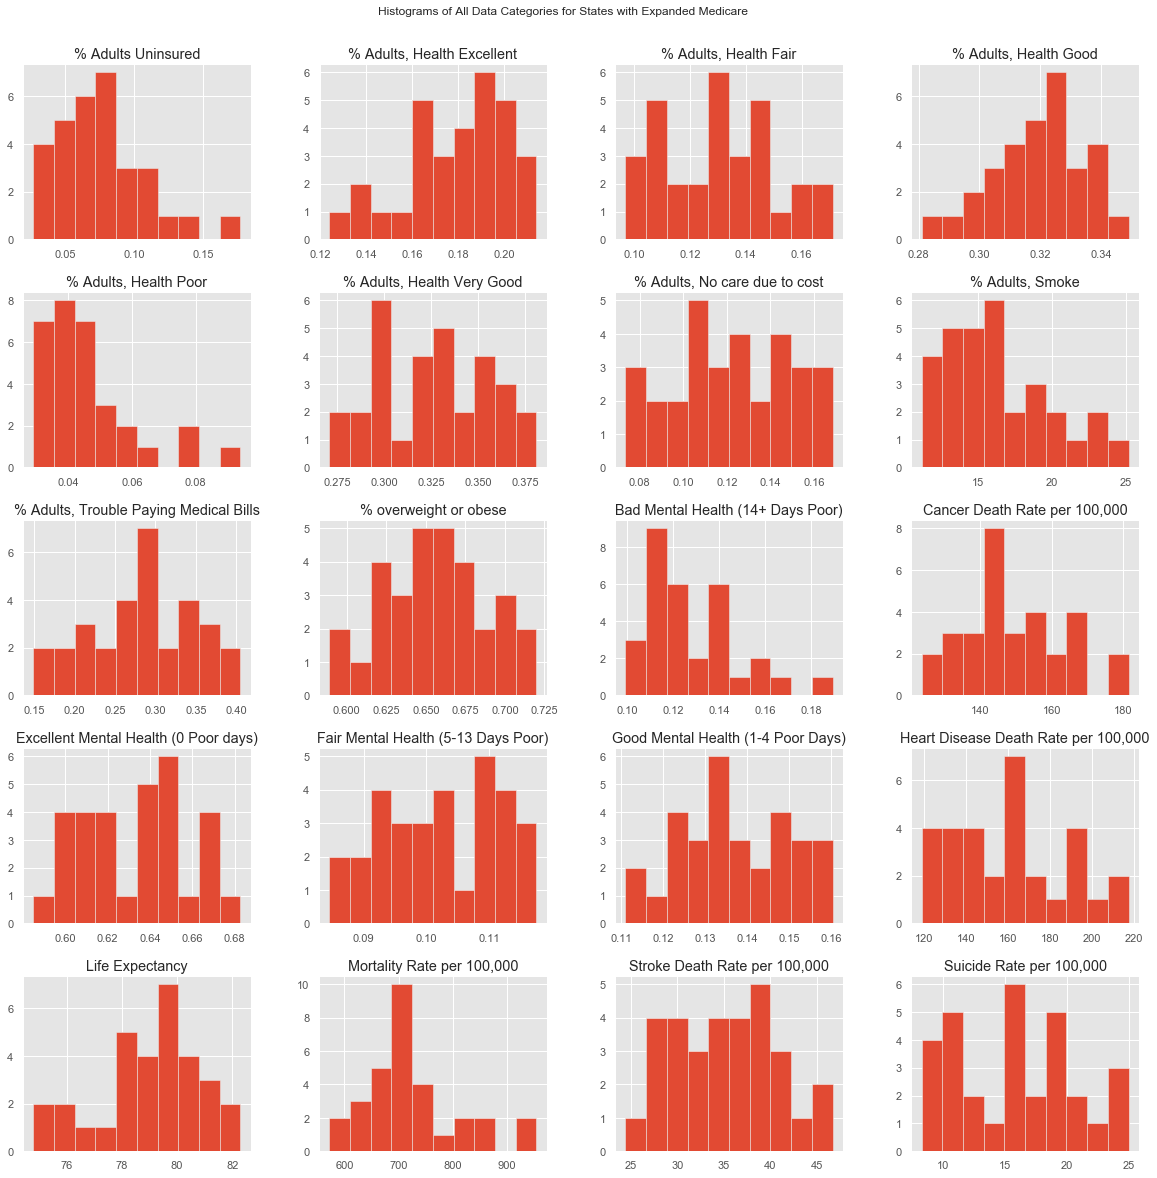

In [229]:
#Histograms of All Data Categories for States with Expanded Medicare
expanded.hist(figsize = (20,20))
pl.suptitle("Histograms of All Data Categories for States with Expanded Medicare" , y = .92)
plt.savefig("Expanded_Histograms.png")

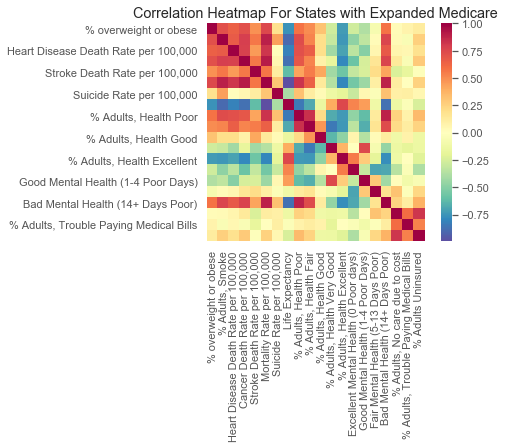

In [230]:
#Correlation Heatmap For States with Expanded Medicare
corrs = expanded.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)

plt.title('Correlation Heatmap For States with Expanded Medicare')
plt.savefig('Heatmap_expanded.png')

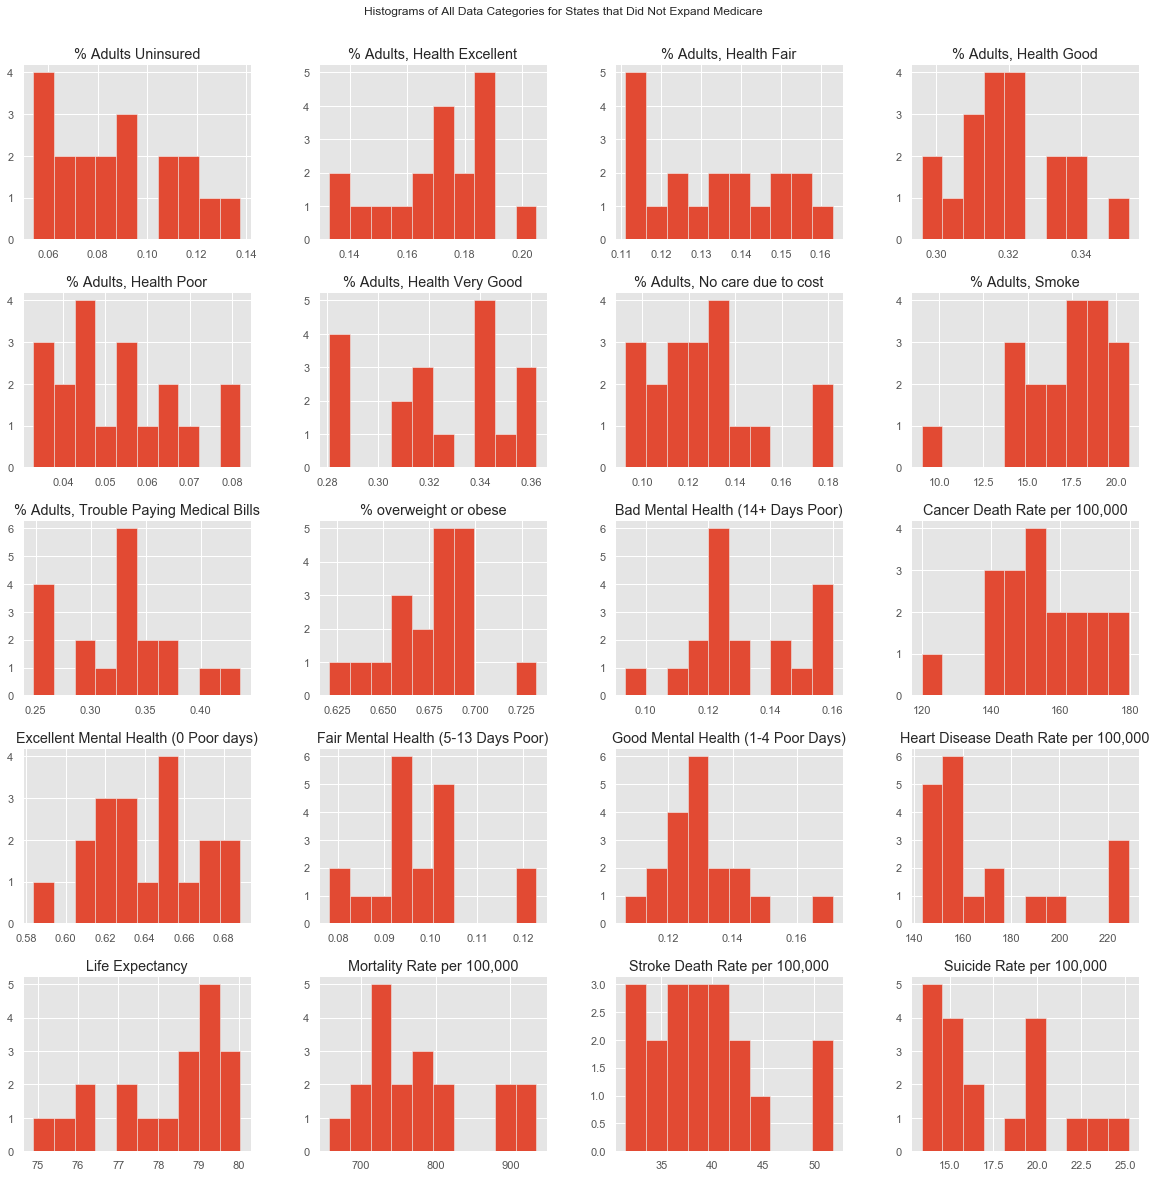

In [231]:
#Histograms of All Data Categories for States that Did Not Expand Medicare
not_expanded.hist(figsize = (20,20))
pl.suptitle("Histograms of All Data Categories for States that Did Not Expand Medicare" , y = .92)
plt.savefig("Not_Histograms.png")

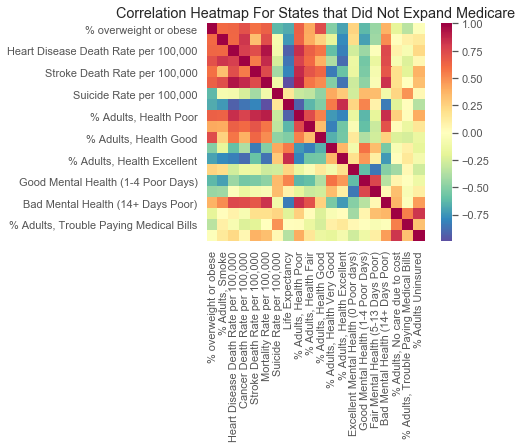

In [232]:
#Correlation Heatmap For States that Did Not Expand Medicare
corrs = not_expanded.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)

plt.title('Correlation Heatmap For States that Did Not Expand Medicare')
plt.savefig('Heatmap_not.png')

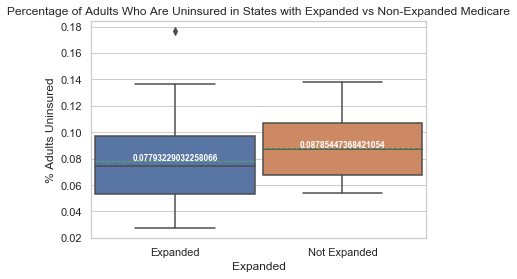

In [233]:
# % Adults Uninsured Boxplots with means labeled
col = '% Adults Uninsured'
sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Are Uninsured in States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Uninsured.png")

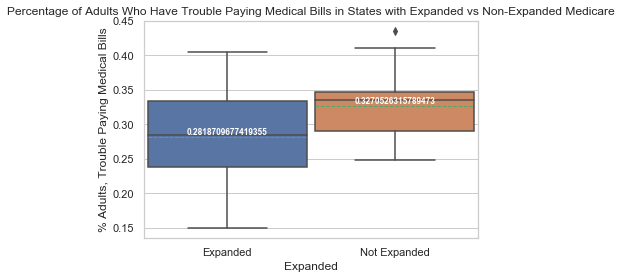

In [234]:
#% Adults, Trouble Paying Medical Bills Boxplots with means labeled
col = '% Adults, Trouble Paying Medical Bills'
sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Have Trouble Paying Medical Bills in States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Trouble.png")


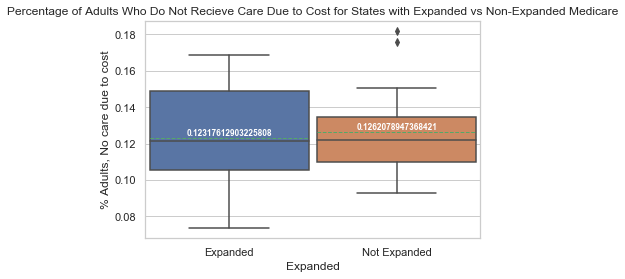

In [235]:
#% Adults, No care due to cost Boxplots with means labeled

col= '% Adults, No care due to cost'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Do Not Recieve Care Due to Cost for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_No_care.png")


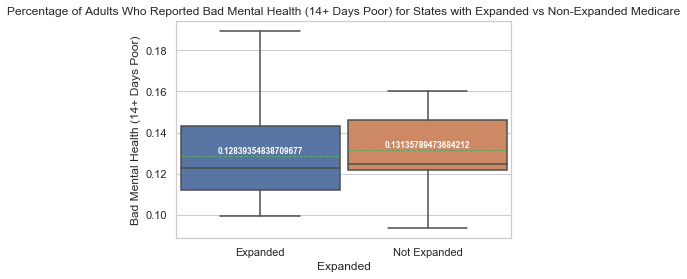

In [236]:
# Bad Mental Health (14+ Days Poor) Boxplots with means labeled
col= 'Bad Mental Health (14+ Days Poor)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Bad Mental Health (14+ Days Poor) for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_BADMH.png")


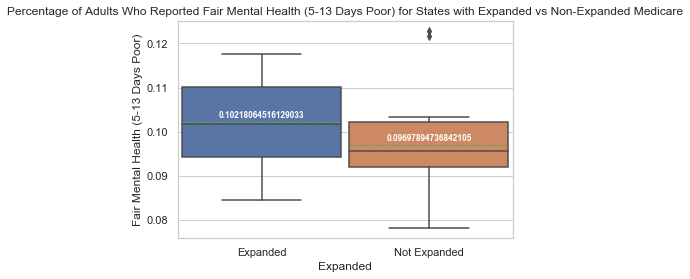

In [237]:
#Fair Mental Health (5-13 Days Poor) Boxplots with means labeled
col= 'Fair Mental Health (5-13 Days Poor)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Fair Mental Health (5-13 Days Poor) for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_FairMH.png")

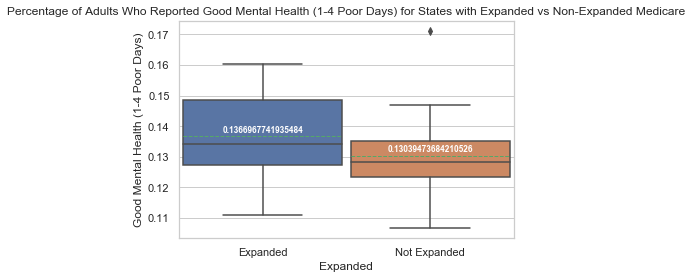

In [238]:
#Good Mental Health (1-4 Poor Days) Boxplots with means labeled
col= 'Good Mental Health (1-4 Poor Days)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Good Mental Health (1-4 Poor Days) for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_GoodMH.png")

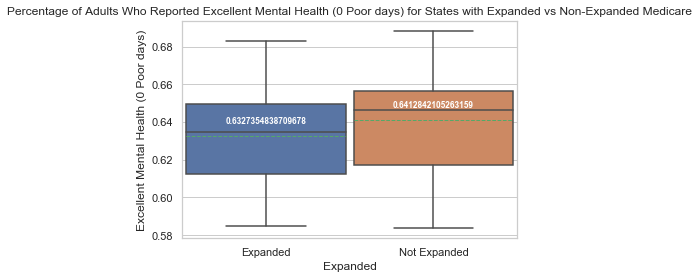

In [239]:
# Excellent Mental Health (0 Poor days) Boxplots with means labeled
col= 'Excellent Mental Health (0 Poor days)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Excellent Mental Health (0 Poor days) for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_EXCMH.png")

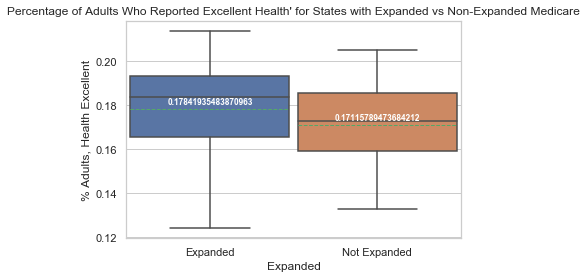

In [240]:
# % Adults, Health Excellent Boxplots with means labeled
col= '% Adults, Health Excellent'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Excellent Health' for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_ExcH.png")

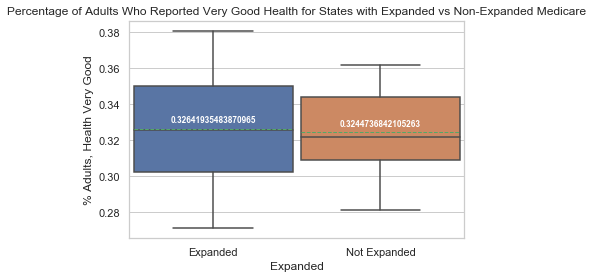

In [241]:
# % Adults, Health Very Good Boxplots with means labeled
col= '% Adults, Health Very Good'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Very Good Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_VGHealth.png")

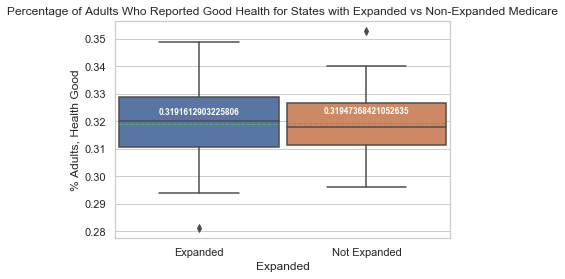

In [242]:
# % Adults, Health Good Boxplots with means labeled
col= '% Adults, Health Good'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Good Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Good_Health.png")

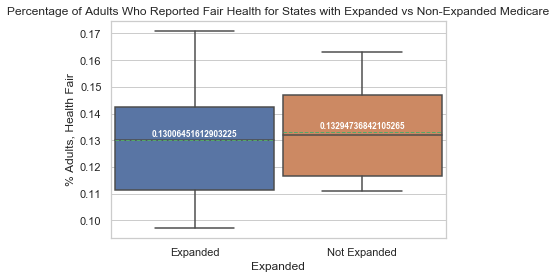

In [243]:
# % Adults, Health Fair Boxplots with means labeled
col= '% Adults, Health Fair'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Fair Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Fair_Health.png")

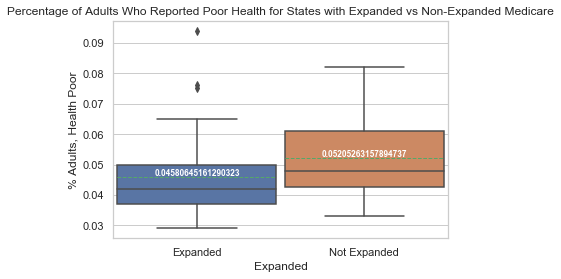

In [244]:
# % Adults, Health Poor Histogram Boxplots with means labeled
col= '% Adults, Health Poor'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults Who Reported Poor Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Poor_Health.png")

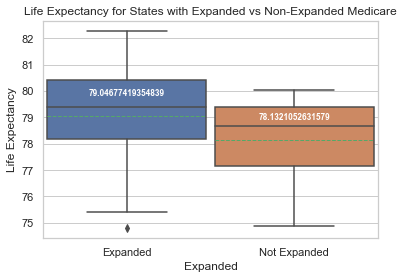

In [245]:
# Life Expectancy Boxplots with means labeled
col= 'Life Expectancy'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Life Expectancy for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_LE.png")

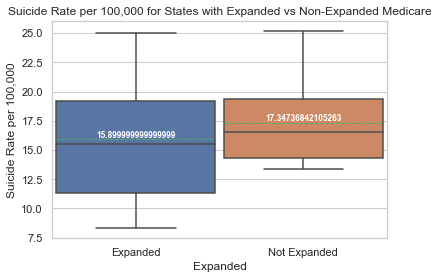

In [246]:
# Boxplots with means labeled for 'Suicide Rate per 100,000'
col= 'Suicide Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Suicide Rate per 100,000 for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_suicide.png")

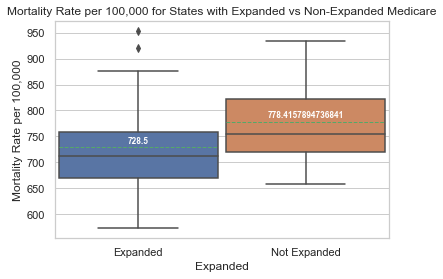

In [247]:
# Boxplots with means labeled for Mortality Rate per 100,000'
col= 'Mortality Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Mortality Rate per 100,000 for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Mortality.png")

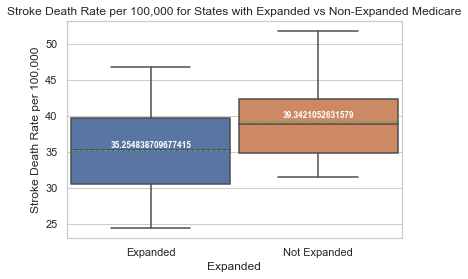

In [248]:
#Boxplots with means labeled Stroke Death Rate per 100,000
col= 'Stroke Death Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Stroke Death Rate per 100,000 for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Stroke.png")

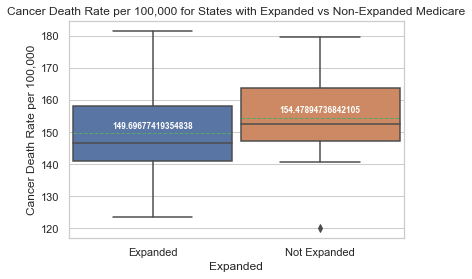

In [249]:
#Boxplots with means labeled Cancer Death Rate per 100,000
col= 'Cancer Death Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Cancer Death Rate per 100,000 for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Cancer.png")

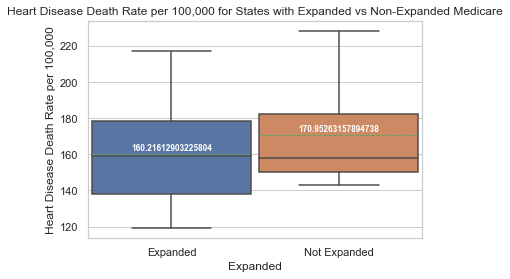

In [250]:
#Boxplots with means labeled Heart Disease Death Rate per 100,000
col= 'Heart Disease Death Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Heart Disease Death Rate per 100,000 for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_HD.png")

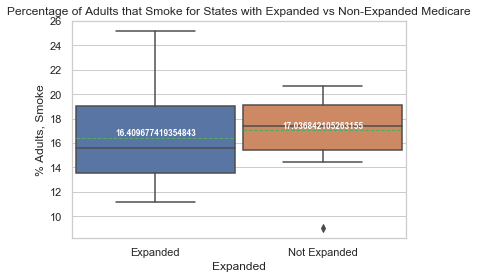

In [251]:
#Boxplots with means labeled % Adults, Smoke
col= '% Adults, Smoke'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults that Smoke for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Smoke.png")

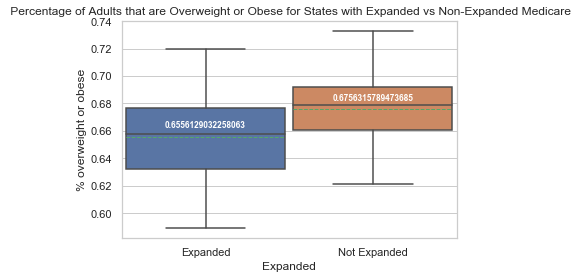

In [252]:
#Boxplots with means labeled % overweight or obese
col=  '% overweight or obese'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title(" Percentage of Adults that are Overweight or Obese for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Overweight.png")